# Multiple Object Tracking with `arcgis.learn`

## _A guide to Multiple Object Tracking with `arcgis.learn` using Kalman Filter and Hungarian Algorithm_

<img alt="" src="https://www.move-lab.com/media/pages/blog/tracking-things-in-object-detection-videos/4144379142-1568189741/output.gif">

## What is tracking?

### Object Detection + Spatio-Temporal features = Tracking

Object Tracking deals with locking on to a particular object and follow it till it exists in the frame.

## What are the problems faced while tracking

* Occlusion
* Variations in view points
* Non Stationary camera
* Annotating training data

## Building blocks of our Tracking Algorithm

<h3> Kalman Filter </h3>

The core idea of a Kalman filter is to use the available detections and previous predictions to arrive at a best guess of the current state, while keeping the possibility of errors in the process.

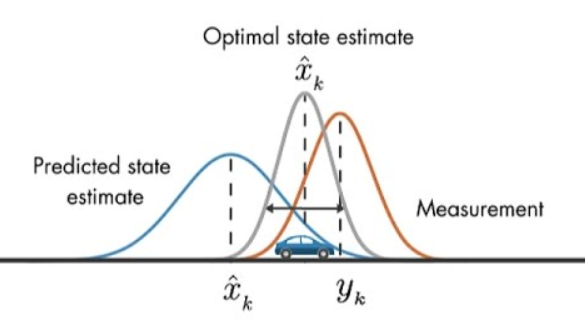

### Hungarian Assignment Algorithm

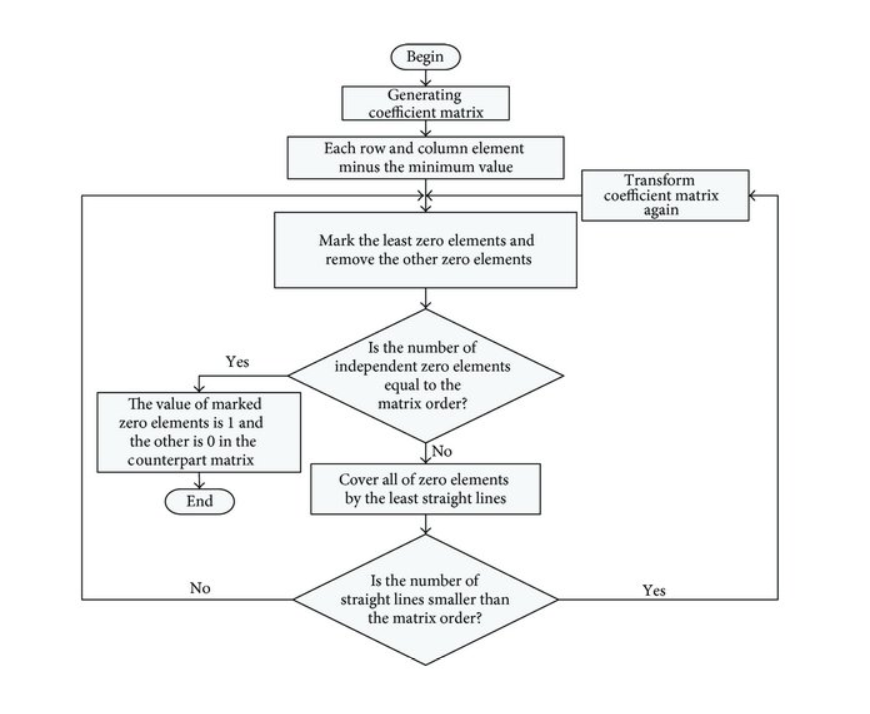

## How does our Tracker work

* For each detection, we create a “Track”, that has all the necessary state information.

* It also has a parameter to track and delete tracks that had their last successful detection long back, as those objects would have left the scene.

* Also, to eliminate duplicate tracks, there is a minimum number of detections threshold for the first few frames.

* Next we use the standard Hungarian algorithm to associate track_i with incoming detection_k.

## How to do it with `arcgis.learn`

* Use `predict_video` function with a object detector model (SSD. Retinanet)

* To enable tracking set parameter `track=True`.

In [7]:
# Imports 

from arcgis.learn import RetinaNet, prepare_data

In [8]:
# Prepare Data and Model

data = prepare_data(path=r'C:\Projects\Office work\tracking\vehicle_detection', 
                    batch_size=4, dataset_type="PASCAL_VOC_rectangles", 
                    resize_to=(480, 480), 
                    chip_size=480)

ret = RetinaNet(data)

Please check your dataset. 9 images dont have the corresponding label files.


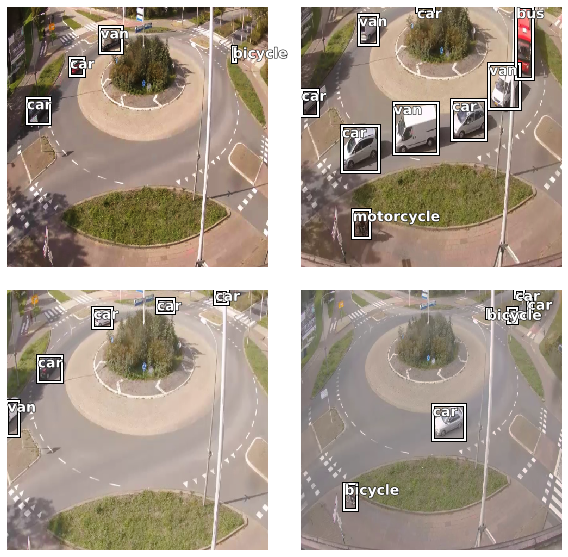

In [10]:
data.show_batch()

In [ ]:
# Fit the model and save it

ret.fit(epochs=100)
ret.save('retina_det')

In [9]:
# Load the model

ret.load(r'C:\Projects\Office work\tracking\vehicle_detection\models\retina_det')

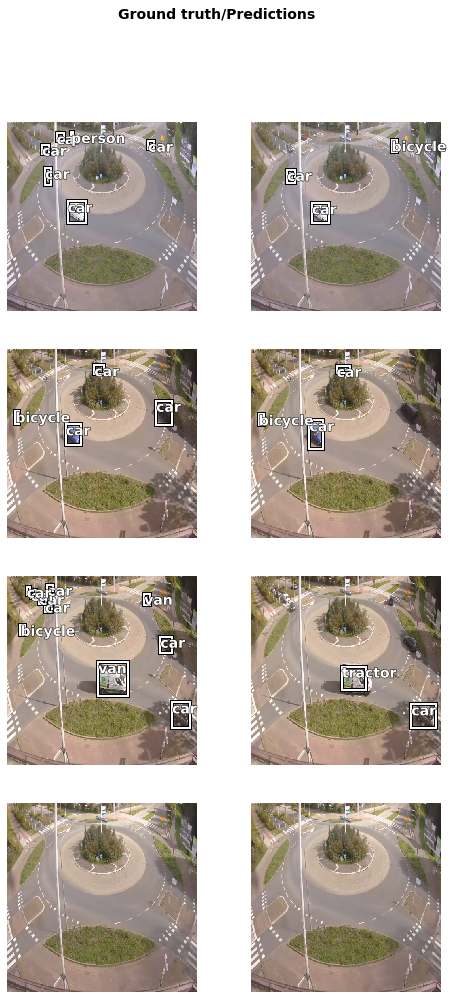

In [11]:
ret.show_results()

In [ ]:
# Use predict video with tracking

ret.predict_video(input_video_path=r'C:\Projects\Office work\tracking\test.mp4', 
                  metadata_file=r'C:\Projects\Office work\tracking\vid1.csv', 
                  track=True, 
                  visualize=True, 
                  threshold=0.5)

## Here are the results !!

In [20]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="test_predictions.mp4" type="video/mp4">
    </video>
""")